## Impact of Climate and Building Characteristics on Energy Consumption

### Data
    train.csv - the training dataset where the observed values of the Site EUI for each row is provided
    
    test.csv - the test dataset where we withhold the observed values of the Site EUI for each row. 

In [42]:
# Import required libraries
import numpy as np
import pandas as pd
# import datetime
# import random

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### Read Data

In [43]:
dfTrain = pd.read_csv("data/train.csv", index_col = "id")
dfTest = pd.read_csv("data/test.csv", index_col = "id")

In [44]:
print("Shape of Train dataset:", dfTrain.shape)
print("Shape of Test dataset:", dfTest.shape)

Shape of Train dataset: (75757, 63)
Shape of Test dataset: (9705, 62)


In [45]:
dfTrain.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


In [46]:
dfTest.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
id,,,,,,,,,,,,,,,,,,,,,
75757,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,0,29,5,2,0,NaN,NaN,NaN,NaN
75758,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,0,29,5,2,0,NaN,NaN,NaN,NaN
75759,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,0,29,5,2,0,NaN,NaN,NaN,NaN
75760,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,0,29,5,2,0,NaN,NaN,NaN,NaN
75761,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,0,29,5,2,0,340.0,330.0,22.8,126.0


In [47]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [52]:
# Check for missing values
lsColsWithMissing = [col for col in dfTrain.columns if dfTrain[col].isnull().any()]
df = pd.DataFrame([(col, dfTrain[col].isnull().sum()) for col in dfTrain.columns if dfTrain[col].isnull().any()]
                  , columns = ["Column Name", "Number of values missing"])

df.sort_values("Number of values missing", ascending = False)

,Column Name,Number of values missing
5,days_with_fog,45796
3,direction_peak_wind_speed,41811
2,direction_max_wind_speed,41082
4,max_wind_speed,41082
1,energy_star_rating,26709
0,year_built,1837


In [53]:
# Distribution before handling missing values
dfTrain[lsColsWithMissing].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_built,73920.0,1952.306764,37.053619,0.0,1927.0,1951.0,1977.0,2015.0
energy_star_rating,49048.0,61.048605,28.663683,0.0,40.0,67.0,85.0,100.0
direction_max_wind_speed,34675.0,66.552675,131.147834,1.0,1.0,1.0,1.0,360.0
direction_peak_wind_speed,33946.0,62.779974,130.308106,1.0,1.0,1.0,1.0,360.0
max_wind_speed,34675.0,4.190601,6.458789,1.0,1.0,1.0,1.0,23.3
days_with_fog,29961.0,109.142051,50.699751,12.0,88.0,104.0,131.0,311.0


In [54]:
# Handling Missing Values
# For column year_built, replacing with current year.
dfTrain["year_built"] = dfTrain["year_built"].replace(np.nan, 2022)

# Replacing rest of the missing values with mean of the columns

dfTrain['energy_star_rating']= dfTrain['energy_star_rating'].replace(np.nan, dfTrain['energy_star_rating'].mean())
dfTrain['direction_max_wind_speed']= dfTrain['direction_max_wind_speed'].replace(np.nan, dfTrain['direction_max_wind_speed'].mean())
dfTrain['direction_peak_wind_speed']= dfTrain['direction_peak_wind_speed'].replace(np.nan, dfTrain['direction_peak_wind_speed'].mean())
dfTrain['max_wind_speed']= dfTrain['max_wind_speed'].replace(np.nan, dfTrain['max_wind_speed'].mean())
dfTrain['days_with_fog']= dfTrain['days_with_fog'].replace(np.nan, dfTrain['days_with_fog'].mean())

In [55]:
# Repeat for Test dataset
# For column year_built, replacing with current year.
dfTest["year_built"] = dfTest["year_built"].replace(np.nan, 2022)

# Replacing rest of the missing values with mean of the columns

dfTest['energy_star_rating']= dfTest['energy_star_rating'].replace(np.nan, dfTest['energy_star_rating'].mean())
dfTest['direction_max_wind_speed']= dfTest['direction_max_wind_speed'].replace(np.nan, dfTest['direction_max_wind_speed'].mean())
dfTest['direction_peak_wind_speed']= dfTest['direction_peak_wind_speed'].replace(np.nan, dfTest['direction_peak_wind_speed'].mean())
dfTest['max_wind_speed']= dfTest['max_wind_speed'].replace(np.nan, dfTest['max_wind_speed'].mean())
dfTest['days_with_fog']= dfTest['days_with_fog'].replace(np.nan, dfTest['days_with_fog'].mean())

In [56]:
# Distribution after handling missing values
dfTrain[lsColsWithMissing].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_built,75757.0,1953.996726,38.139247,0.0,1927.000000,1953.000000,1981.000000,2022.0
energy_star_rating,75757.0,61.048605,23.063738,0.0,56.000000,61.048605,76.000000,100.0
direction_max_wind_speed,75757.0,66.552675,88.726751,1.0,1.000000,66.552675,66.552675,360.0
direction_peak_wind_speed,75757.0,62.779974,87.226977,1.0,1.000000,62.779974,62.779974,360.0
max_wind_speed,75757.0,4.190601,4.369629,1.0,1.000000,4.190601,4.190601,23.3
days_with_fog,75757.0,109.142051,31.883663,12.0,109.142051,109.142051,109.142051,311.0


In [90]:
# Find categorical columns
lsCategoricalCols = [col for col in dfTrain.columns if (dfTrain[col].nunique() > 1) & (dfTrain[col].dtype != np.number)& (dfTrain[col].dtype != int)]
lsCategoricalCols

/var/folders/jx/444kq49x43bf7_018m4_rh980000gn/T/ipykernel_25550/452712714.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  lsCategoricalCols = [col for col in dfTrain.columns if (dfTrain[col].nunique() > 1) & (dfTrain[col].dtype != np.number)& (dfTrain[col].dtype != int)]


['State_Factor', 'building_class', 'facility_type']

In [61]:
# Set dtype as category for categorical columns
for col in lsCategoricalCols:
    dfTrain[col]= dfTrain[col].astype('category')

In [88]:
# Find numerical columns
lsNumericalCols = dfTrain.select_dtypes('number').columns
lsNumericalCols = lsNumericalCols.values.tolist()
lsNumericalCols

['Year_Factor',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

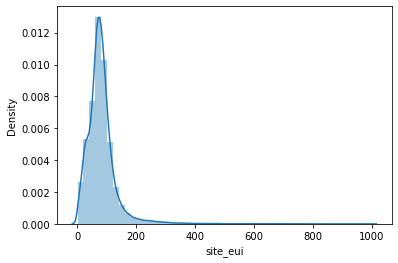

In [64]:
# Explore the distribution of the target variable - Site EUI
sns.distplot(dfTrain['site_eui'])

Site EUI is positively skewed and have long right side tail.

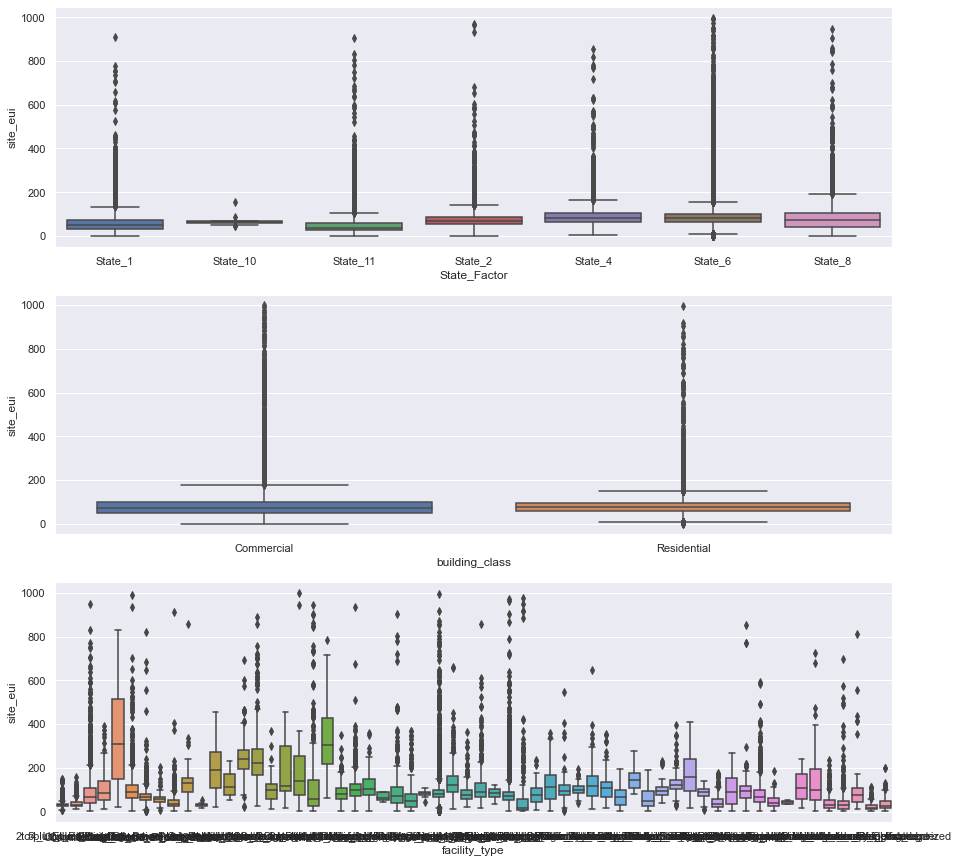

In [95]:
plt.figure(figsize=(15, 15))

for col in lsCategoricalCols:
    i = lsCategoricalCols.index(col) + 1
    plt.subplot(3,1,i)
    sns.boxplot(data=dfTrain, x=col, y='site_eui')
plt.show()

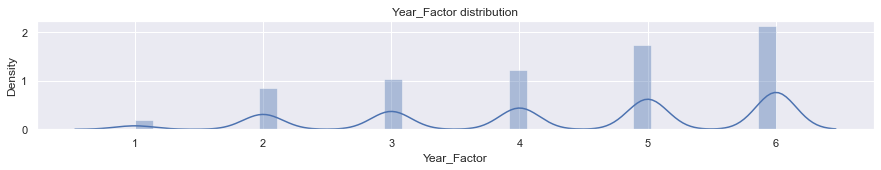

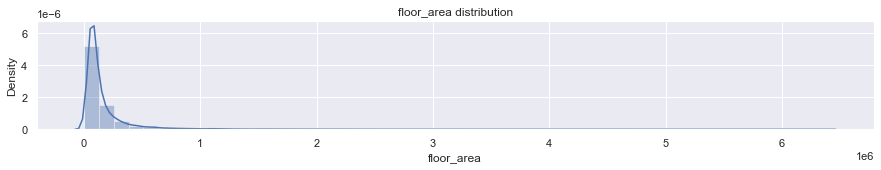

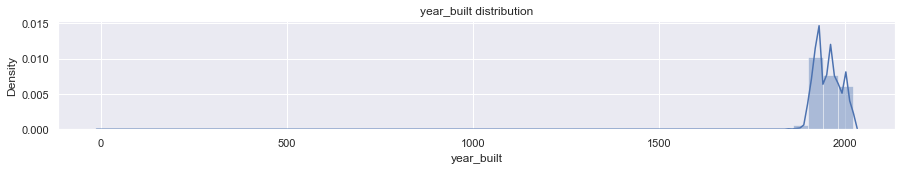

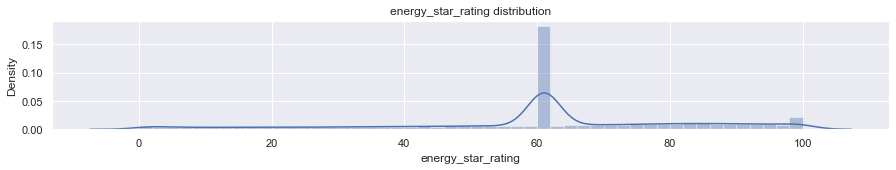

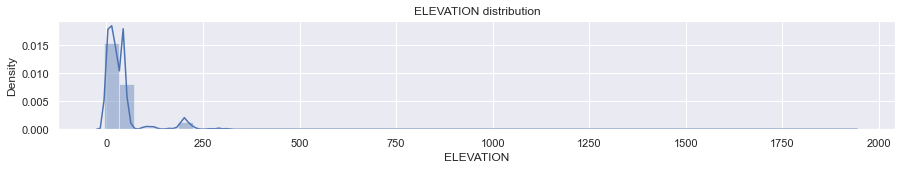

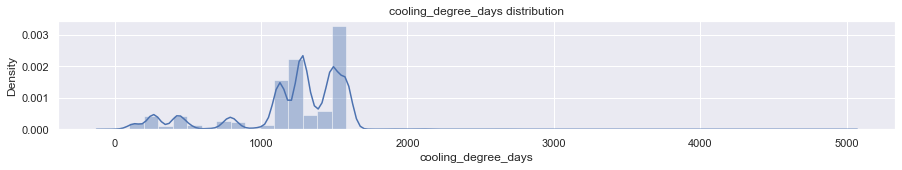

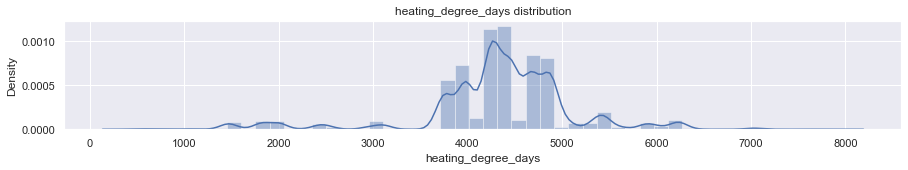

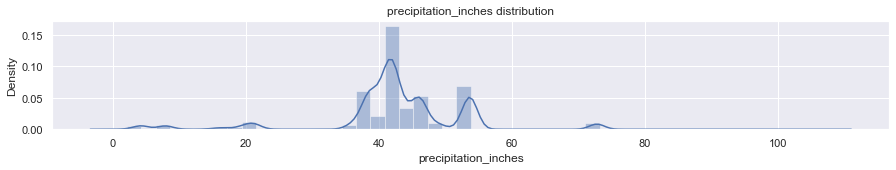

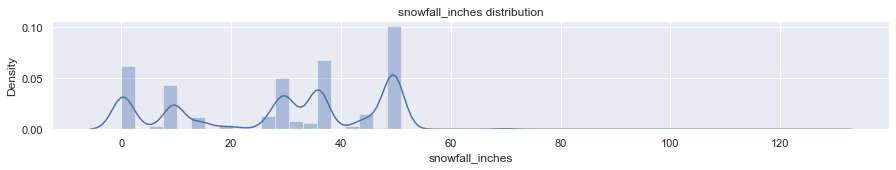

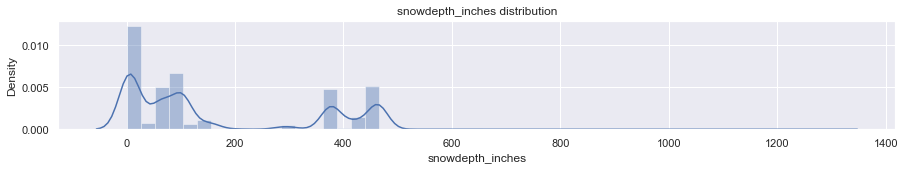

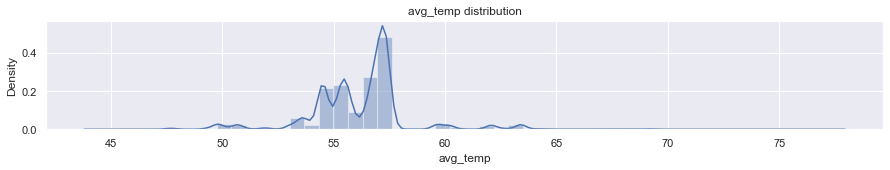

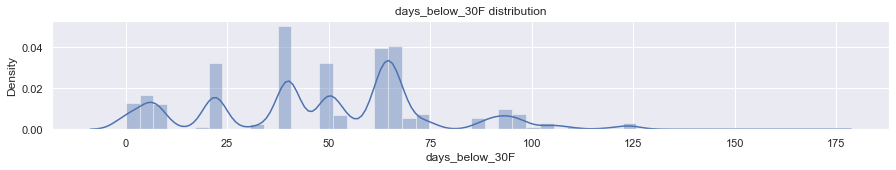

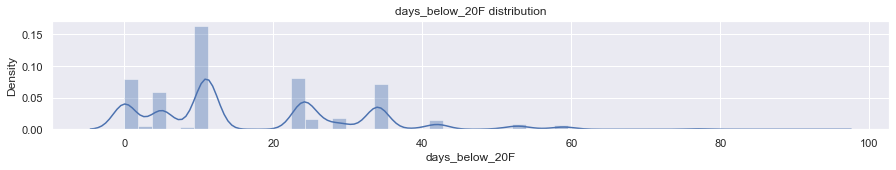

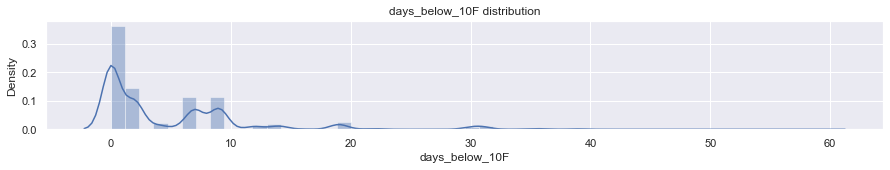

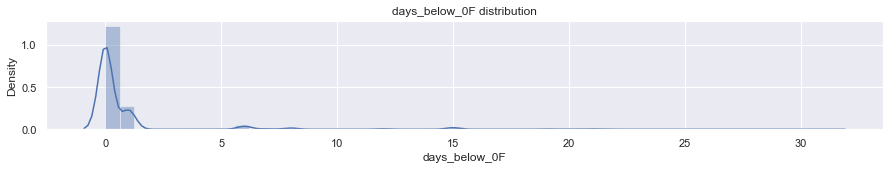

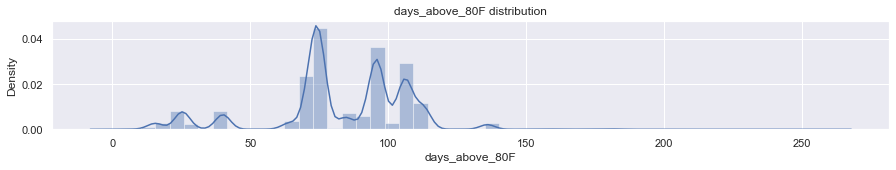

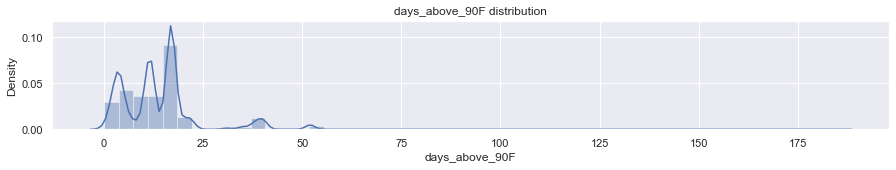

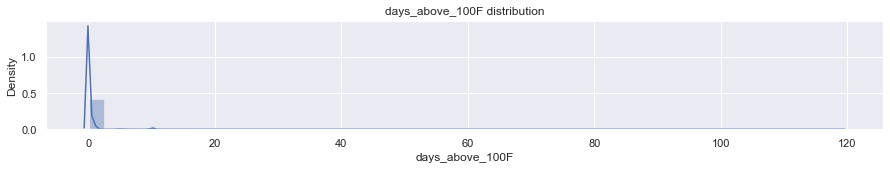

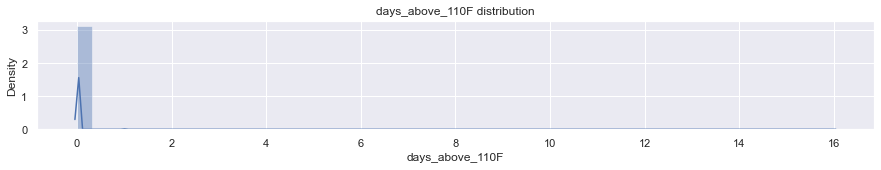

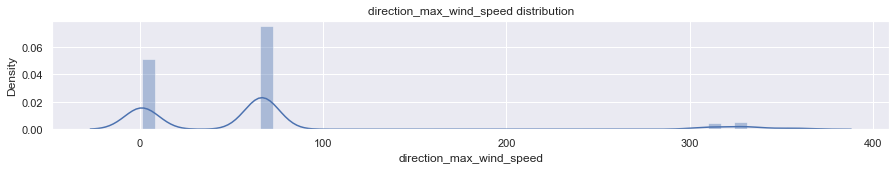

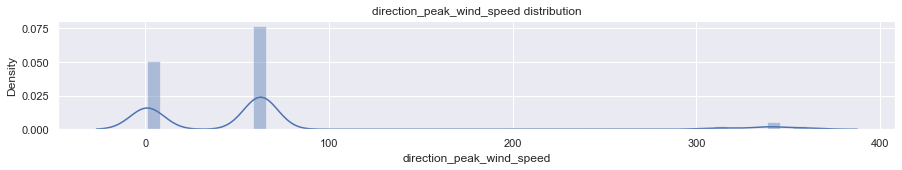

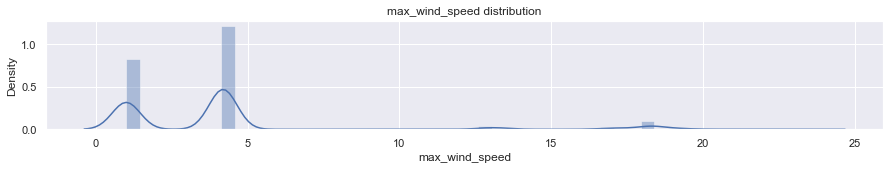

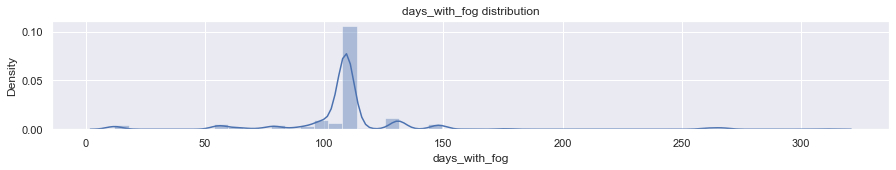

In [105]:
lsCols = ['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION',  'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
i=1
for col in lsCols:
    plt.figure(figsize=(15, 2))
    sns.distplot(dfTrain[col],kde=True)
    plt.title(col+" distribution")
    #i=i+1
    plt.show()

In [99]:
def detect_outlier(feature):
    outliers = []
    data = dfTrain[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y - mean) / std
        if np.abs(z_score) > 3:          # if z_score is greather than 3, considered as outlier
            outliers.append(y)
            
    print('\nOutlier caps for {}: '.format(feature))
    
    print('     --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                                                     len([i for i in data
                                                                                         if i > data.quantile(.95)])))

    print('     --3std: {:.1f} / {} values exceed that'.format(mean + 3 *(std), len(outliers)))
    
    print('     --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                                                     len([i for i in data
                                                                                         if i > data.quantile(.99)])))


In [101]:
# for col in cols:
#     detect_outlier(col)

/var/folders/jx/444kq49x43bf7_018m4_rh980000gn/T/ipykernel_25550/3349007343.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dfTrain[lsCols].corr(), dtype=np.bool)


<AxesSubplot:>

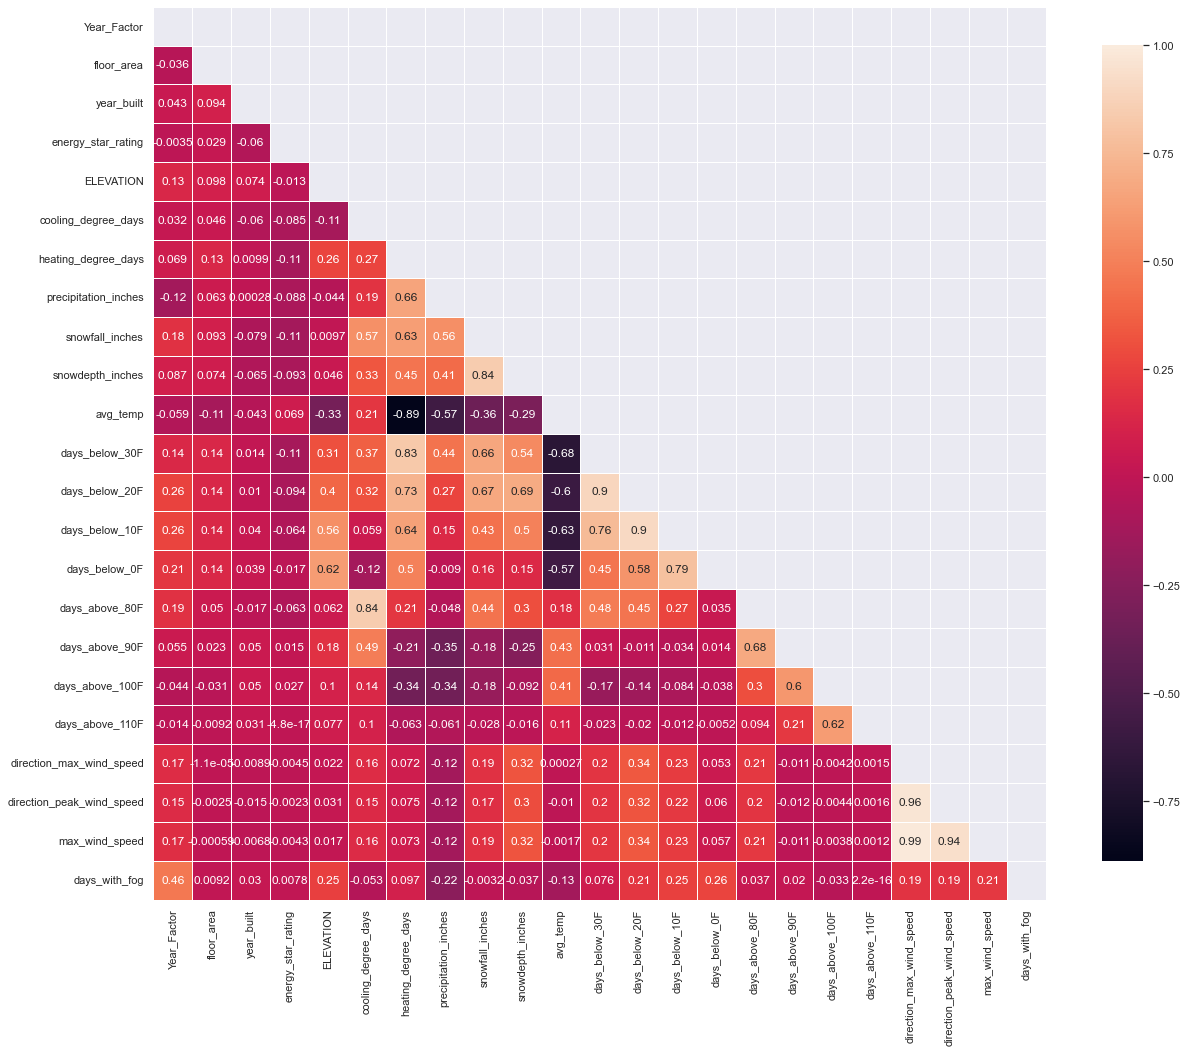

In [124]:
# Correlation between the variables
mask = np.zeros_like(dfTrain[lsCols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dfTrain[lsCols].corr(), mask=mask, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})


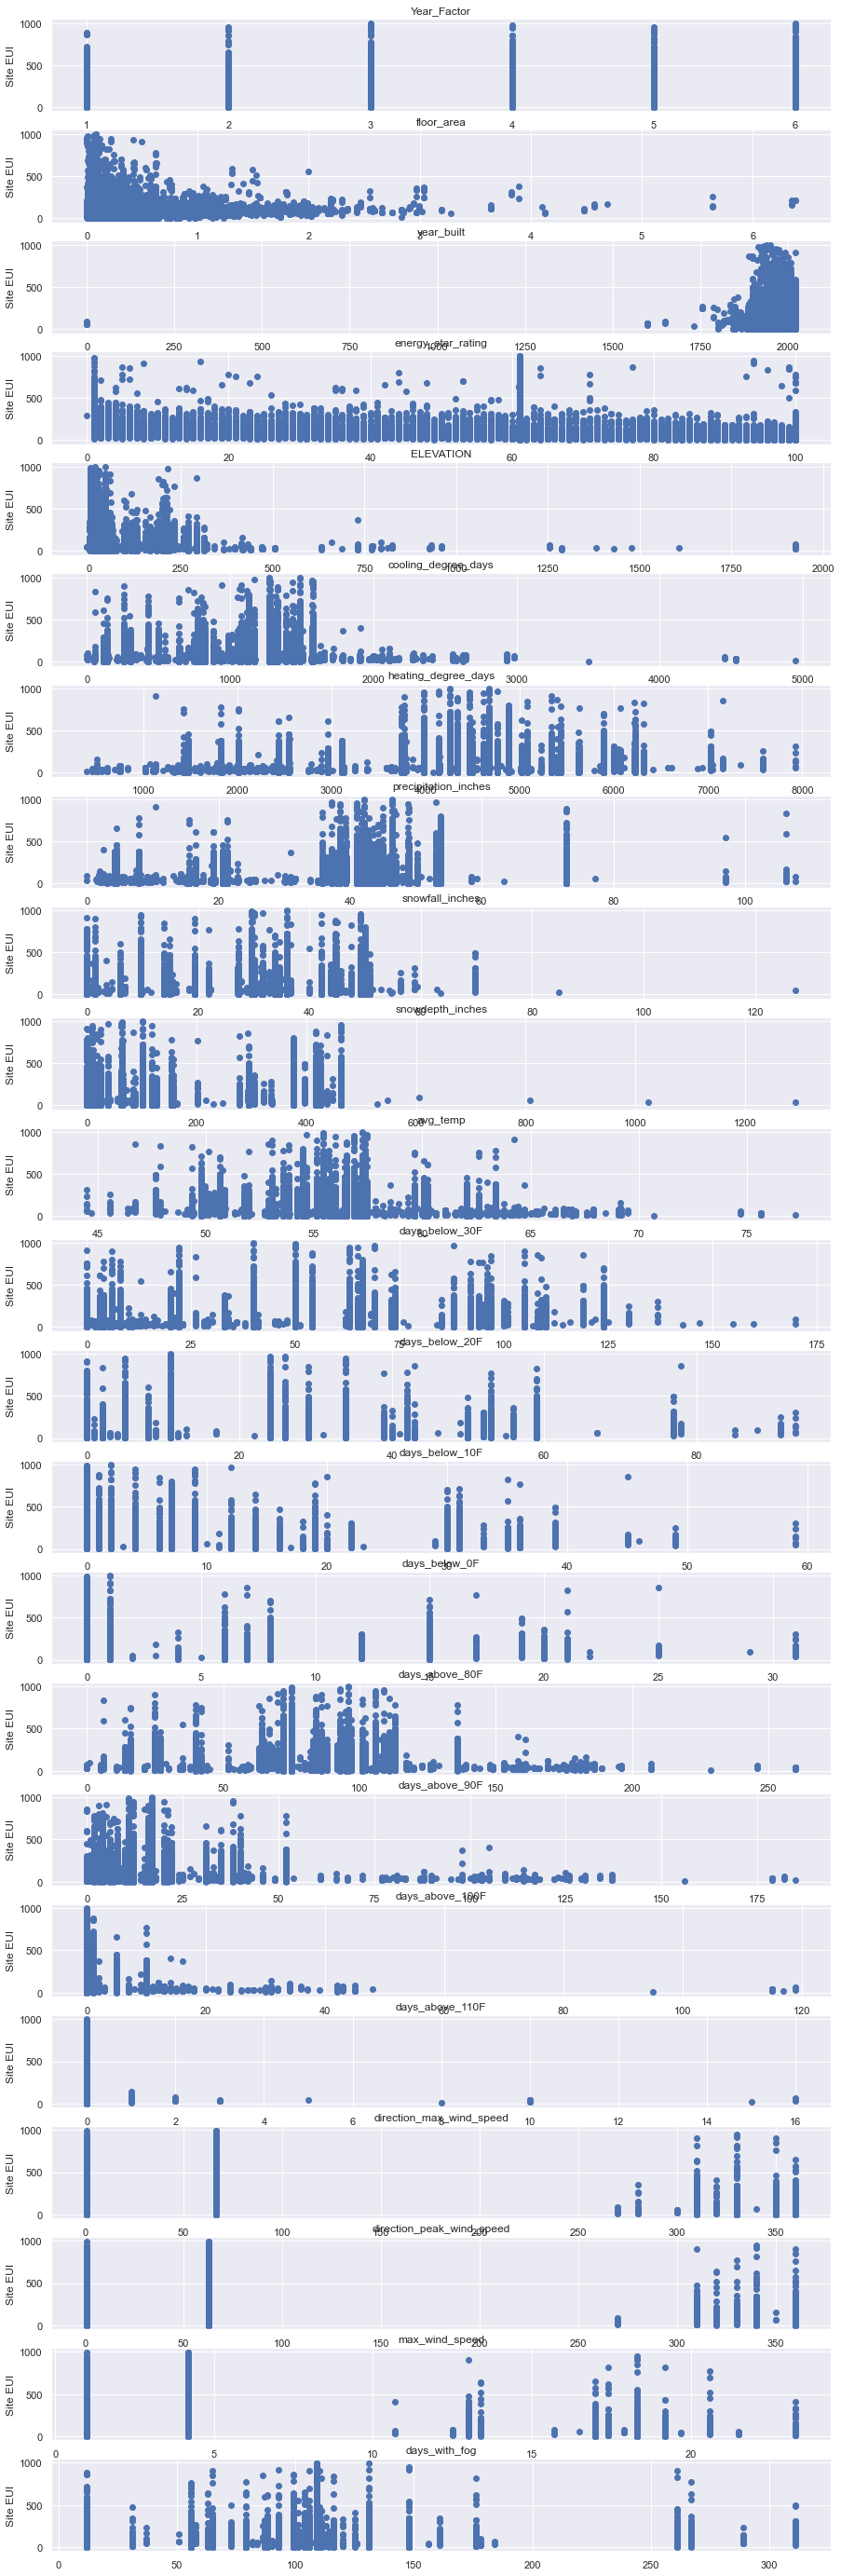

In [119]:
# relationship between the variables and site eui
fig = plt.figure(figsize=(15,50))
ax = fig.subplots(len(lsCols),1)
for col in lsCols:
    i = lsCols.index(col)
    ax[i].scatter(x = dfTrain[col], y = dfTrain["site_eui"])
    ax[i].set(title = col)
    # ax[i].set(xlabel = col)
    ax[i].set(ylabel = "Site EUI")
plt.show()